# Importing Libraries

In [1]:
# data processing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Algorithms
from sklearn import model_selection
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV


from sklearn import metrics  


import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
cust=pd.read_csv('customer churn')

In [3]:
cust.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Descriptive Analysis

In [4]:
cust.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


* Minimum total day charge is 0 and maximum total day charge is 59.64  

In [5]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

* State ,phone number,international plan,voice mail plan are objects.
* Account length,area code,number vmail messages,total day calls,total eve calls,total night calls,total int1 calls,customer service calls are in integer.
* Other than these features are floating .

# Exploratory Data Analysis

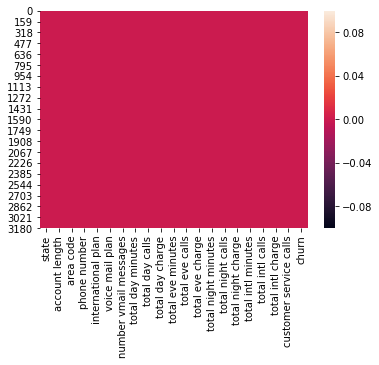

In [6]:
#Checking null data
sns.heatmap(cust.isnull())

From here we can observe that there is no null data present in this dataset.

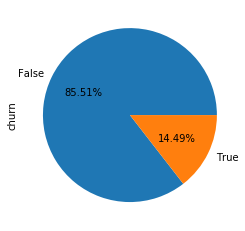

In [7]:
cust['churn'].value_counts().plot.pie(autopct="%2.2f%%")

From here we can observe that the 85 % of churn's are Female and 14 % of the churns are male.

In [8]:
#cleaning columns
cust.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [9]:
cust.columns=['State', 'Account_length', 'Area_code', 'Phone_number',
       'International plan', 'Voice_mail_plan', 'Number_vmail_messages',
       'Total day minutes', 'Total day calls', 'Total_day_charge',
       'Total_eve_minutes', 'Total_eve_calls', 'Total_eve_charge',
       'Total_night_minutes', 'Total_night_calls', 'Total_night_charge',
       'Total_int_minutes', 'Total_intl_calls', 'Total_intl_charge',
       'Customer_service_calls', 'Churn']

In [10]:
#let's check once
cust.columns

Index(['State', 'Account_length', 'Area_code', 'Phone_number',
       'International plan', 'Voice_mail_plan', 'Number_vmail_messages',
       'Total day minutes', 'Total day calls', 'Total_day_charge',
       'Total_eve_minutes', 'Total_eve_calls', 'Total_eve_charge',
       'Total_night_minutes', 'Total_night_calls', 'Total_night_charge',
       'Total_int_minutes', 'Total_intl_calls', 'Total_intl_charge',
       'Customer_service_calls', 'Churn'],
      dtype='object')

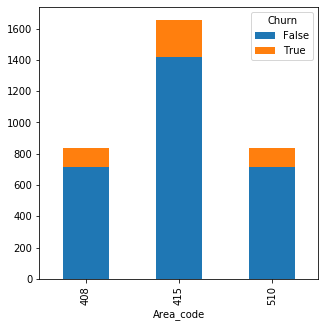

In [11]:
cust.groupby(["Area_code", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

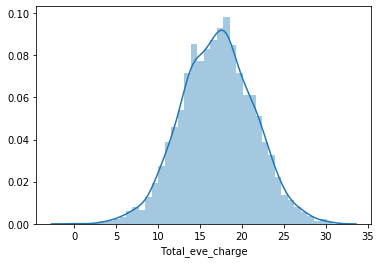

In [12]:
sns.distplot(cust['Total_eve_charge'])

From here we can observe that Total_eve_charge is a normal distributed .In the sense if Total_eve
-charge if increases then churn also going to increase.

In [13]:
le=LabelEncoder()
list1=['State','International plan','Voice_mail_plan','Churn']
for val in list1:
    cust[val]=le.fit_transform(cust[val].astype(str))

In [14]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State                     3333 non-null int32
Account_length            3333 non-null int64
Area_code                 3333 non-null int64
Phone_number              3333 non-null object
International plan        3333 non-null int32
Voice_mail_plan           3333 non-null int32
Number_vmail_messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total_day_charge          3333 non-null float64
Total_eve_minutes         3333 non-null float64
Total_eve_calls           3333 non-null int64
Total_eve_charge          3333 non-null float64
Total_night_minutes       3333 non-null float64
Total_night_calls         3333 non-null int64
Total_night_charge        3333 non-null float64
Total_int_minutes         3333 non-null float64
Total_intl_calls          3333 non-null int64
Total_intl_charge         3333 non-null float64
Cu

Here you can observe that the data had been changed to integer format.

In [15]:
cust.drop('Phone_number',axis=1,inplace=True)

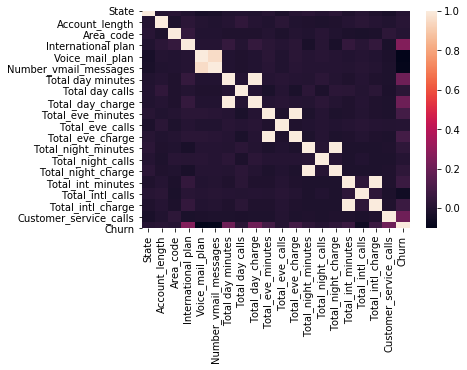

In [16]:
sns.heatmap(cust.corr())

# Check Distribution of Skewness

In [17]:
collist=cust.columns
ncol=20
nrows=18

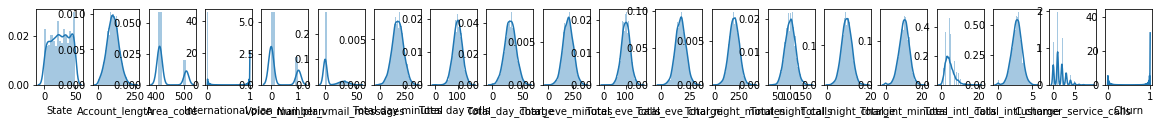

In [18]:
plt.figure(figsize=(20,30))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(cust[collist[i]])

In [19]:
cust.skew()

State                    -0.064618
Account_length            0.096606
Area_code                 1.126823
International plan        2.726332
Voice_mail_plan           0.999140
Number_vmail_messages     1.264824
Total day minutes        -0.029077
Total day calls          -0.111787
Total_day_charge         -0.029083
Total_eve_minutes        -0.023877
Total_eve_calls          -0.055563
Total_eve_charge         -0.023858
Total_night_minutes       0.008921
Total_night_calls         0.032500
Total_night_charge        0.008886
Total_int_minutes        -0.245136
Total_intl_calls          1.321478
Total_intl_charge        -0.245287
Customer_service_calls    1.091359
Churn                     2.018356
dtype: float64

In [20]:
x=cust.iloc[:,:-1]
x.shape

(3333, 19)

In [21]:
y=cust['Churn']
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [22]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [23]:
x.skew()

State                    -0.064618
Account_length            0.096606
Area_code                 1.122881
International plan        2.726332
Voice_mail_plan           0.999140
Number_vmail_messages     1.028178
Total day minutes        -0.029077
Total day calls          -0.111787
Total_day_charge         -0.029083
Total_eve_minutes        -0.023877
Total_eve_calls          -0.055563
Total_eve_charge         -0.023858
Total_night_minutes       0.008921
Total_night_calls         0.032500
Total_night_charge        0.008886
Total_int_minutes        -0.245136
Total_intl_calls         -0.199368
Total_intl_charge        -0.245287
Customer_service_calls   -0.138568
dtype: float64

# Splitting the DataSet

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=43)

In [25]:
x_train.shape

(2999, 19)

In [26]:
y_train.shape

(2999,)

In [27]:
x_test.shape

(334, 19)

In [28]:
y_test.shape

(334,)

In [29]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()

In [30]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Applying MachineLearning Models

In [31]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()
gbc=GradientBoostingClassifier()

************** DecisionTreeClassifier ***********


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


accuracy score 0.9041916167664671
Cross-val-score= 0.9147922957870834


roc_auc_score 0.8581939799331104


              precision    recall  f1-score   support

           0       0.98      0.92      0.94       299
           1       0.53      0.80      0.64        35

    accuracy                           0.90       334
   macro avg       0.75      0.86      0.79       334
weighted avg       0.93      0.90      0.91       334



[[274  25]
 [  7  28]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


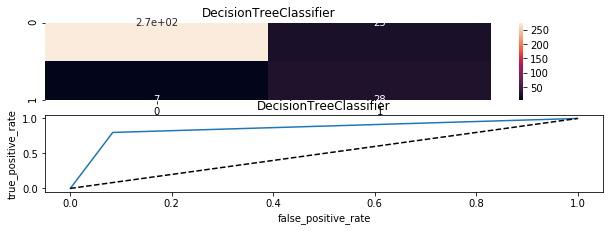

************** RandomForestClassifier ***********


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


accuracy score 0.9580838323353293
Cross-val-score= 0.9420995143963363


roc_auc_score 0.8504538939321549


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       299
           1       0.86      0.71      0.78        35

    accuracy                           0.96       334
   macro avg       0.91      0.85      0.88       334
weighted avg       0.96      0.96      0.96       334



[[295   4]
 [ 10  25

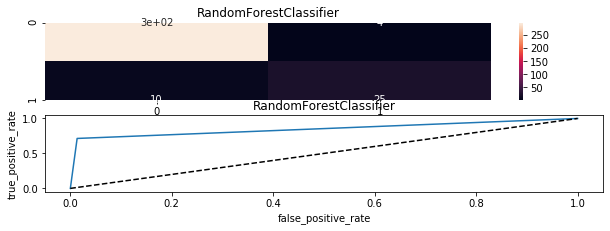

************** KNeighborsClassifier ***********


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


accuracy score 0.9041916167664671
Cross-val-score= 0.8661986268427002


roc_auc_score 0.6563784042044912


              precision    recall  f1-score   support

           0       0.93      0.97      0.95       299
           1       0.57      0.34      0.43        35

    accuracy                           0.90       334
   macro avg       0.75      0.66      0.69       334
weighted avg       0.89      0.90      0.89       334



[[290   9]
 [ 23  12]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


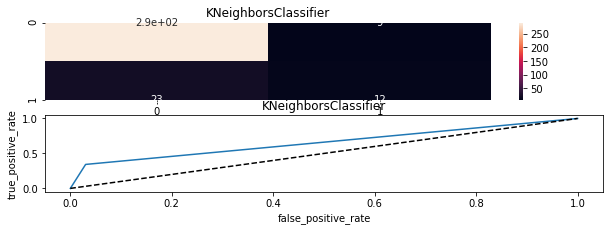

************** SGDClassifier ***********


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


accuracy score 0.8652694610778443
Cross-val-score= 0.7788852802140985


roc_auc_score 0.5211180124223602


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       299
           1       0.19      0.09      0.12        35

    accuracy                           0.87       334
   macro avg       0.54      0.52      0.52       334
weighted avg       0.82      0.87      0.84       334



[[286  13]
 [ 32   3]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


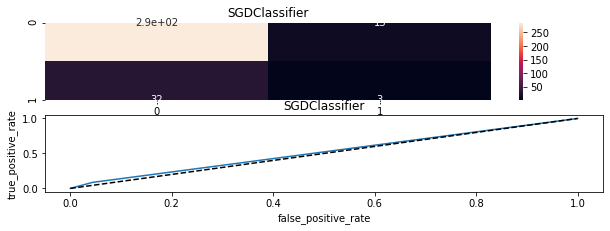

************** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy score 0.8862275449101796
Cross-val-score= 0.8643860300053937


roc_auc_score 0.5958910654562829


              precision    recall  f1-score   support

           0       0.91      0.96      0.94       299
           1       0.42      0.23      0.30        35

    accuracy                           0.89       334
   macro avg       0.67      0.60      0.62       334
weighted avg       0.86      0.89      0.87       334



[[288  11]
 [ 27   8]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


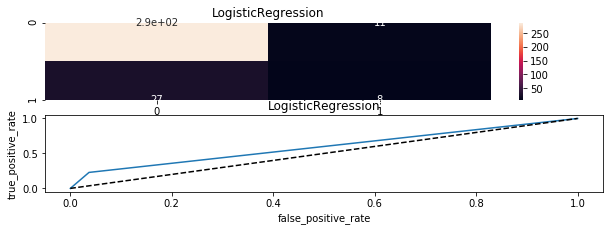

************** GradientBoostingClassifier ***********


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


accuracy score 0.9491017964071856
Cross-val-score= 0.9502122261501093


roc_auc_score 0.8832775919732442


              precision    recall  f1-score   support

           0       0.98      0.97      0.97       299
           1       0.74      0.80      0.77       

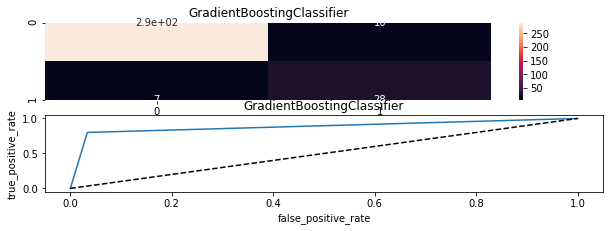

In [32]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))
models.append(('GradientBoostingClassifier',gbc))


#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv=model_selection.cross_val_score(model,x,y,cv=20,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

In [33]:
result=pd.DataFrame({'Model':Model,'cvs':cvs,'score':score,'rocscore':rocscore},columns=['Model','cvs','score','rocscore'])
result

,Model,cvs,score,rocscore
0,DecisionTreeClassifier,91.479230,90.419162,85.819398
1,RandomForestClassifier,94.209951,95.808383,85.045389
2,KNeighborsClassifier,86.619863,90.419162,65.637840
3,SGDClassifier,77.888528,86.526946,52.111801
4,LogisticRegression,86.438603,88.622754,59.589107
5,GradientBoostingClassifier,95.021223,94.910180,88.327759


# Selecting Best model

From here we can observe that RandomForestClassifier is best algorithm for this dataset.

[0.0248422  0.02784227 0.00722443 0.0673095  0.02824011 0.02756666
 0.17354834 0.02854469 0.09871735 0.06738187 0.02794899 0.07164972
 0.03727176 0.02674761 0.03881063 0.04487979 0.04669402 0.03080527
 0.12397479]


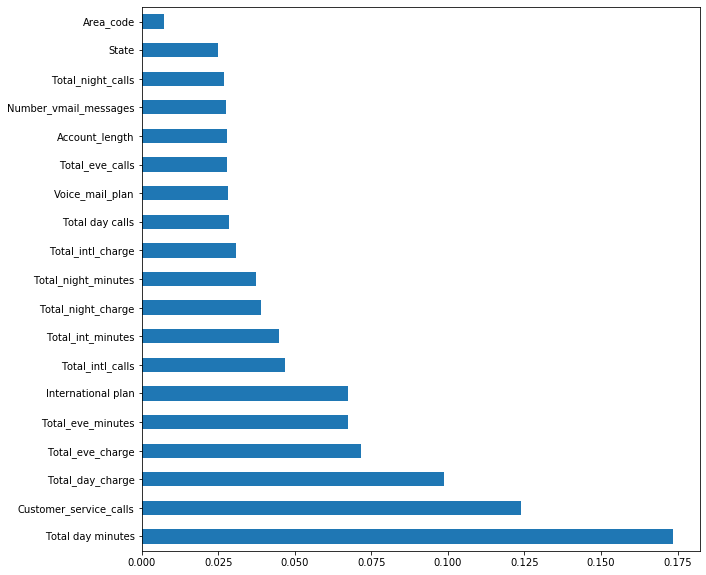

In [34]:
feature_importance = rfc.feature_importances_
print (rfc.feature_importances_)
feat_importances = pd.Series(rfc.feature_importances_, index=x.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

From here we can observe that Area_code feature has less contribution so t's better to this feature and run it again.

In [35]:
x=x.drop('Area_code',axis=1)
x.head()

,State,Account_length,International plan,Voice_mail_plan,Number_vmail_messages,Total day minutes,Total day calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_int_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls
0,16,128,0.000000,0.693147,3.258097,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,1.386294,2.70,0.693147
1,35,107,0.000000,0.693147,3.295837,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,1.386294,3.70,0.693147
2,31,137,0.000000,0.000000,0.000000,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,1.791759,3.29,0.000000
3,35,84,0.693147,0.000000,0.000000,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,2.079442,1.78,1.098612
4,36,75,0.693147,0.000000,0.000000,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,1.386294,2.73,1.386294


In [36]:
rfc.fit(x_train,y_train)
print(rfc)
pred=rfc.predict(x_test)
print('\n')
acc=accuracy_score(y_test,pred)
print('accuracy score',acc)
score.append(acc*100)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


accuracy score 0.9491017964071856


you can see difference before removeing Are_code feature and after .

# Predicting Data

In [37]:
pred=rfc.predict(x_test)
print('predicted insurance claim:',pred)
print('actual insurance claim',y_test)

predicted insurance claim: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
actual insurance claim 716     0
2382    0
1479    0
2418    0
1799    0
       ..
2454    0
962     0
1395    0
80      0
269     0
Name: Churn, Length: 334, dtype: int32


# Saving Model

In [38]:
cust=pd.DataFrame(pred)
cust.to_csv('rfc_cust.csv')

In [39]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(rfc,'cust_rfc.obj')
#load the model from a file
rfc_from_joblib=joblib.load('cust_rfc.obj')
#use the loaded model to make prediction
rfc_from_joblib.predict(x_test)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,